# Ireland Age and Sex Analysis
## Author: Joanna Mnich


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Part 1 
### The difference between the sexes by age

In [33]:
# Load dataset
url = "https://ws.cso.ie/public/api.restful/PxStat.Data.Cube_API.ReadDataset/FY006B/CSV/1.0/en"
df = pd.read_csv(url) # Read CSV data from URL

print("Unique Sex values:", df["Sex"].unique()) # To check how 'Sex' values are represented in the dataset

Unique Sex values: ['Both sexes' 'Male' 'Female']


### https://pandas.pydata.org/docs/reference/api/pandas.Series.isin.html
### https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html

In [34]:
# Keep only Male and Female
df = df[df["Sex"].isin(["Male", "Female"])] # Adjust based on actual values found

In [35]:
# Remove 'All ages' and clean age column
df = df[df["Single Year of Age"] != "All ages"]
df["Single Year of Age"] = df["Single Year of Age"].replace("Under 1 year", "0")
df["Single Year of Age"] = df["Single Year of Age"].replace("100 years and over", "100")

# Convert to string before removing non-numeric characters, then to int
df["Single Year of Age"] = df["Single Year of Age"].astype(str)
df["Single Year of Age"] = df["Single Year of Age"].str.replace(r"\D", "", regex=True)
df["Single Year of Age"] = df["Single Year of Age"].astype(int)


In [36]:
# Convert population values to integers
df["VALUE"] = df["VALUE"].astype(int) 

# Split data by sex
male_df = df[df["Sex"] == "Male"] 
female_df = df[df["Sex"] == "Female"]

print("Male rows:", len(male_df))
print("Female rows:", len(female_df))

Male rows: 9393
Female rows: 9393


### https://pandas.pydata.org/docs/reference/api/pandas.isna.html
### https://numpy.org/doc/stable/reference/constants.html#numpy.nan

In [37]:
# Functions for calculations
def weighted_mean_age(df_sex): # Calculate weighted mean age
    total_people = df_sex["VALUE"].sum() 
    if total_people == 0 or pd.isna(total_people): # Avoid division by zero
        return np.nan # Return NaN if no people
    total_age_weighted = (df_sex["Single Year of Age"] * df_sex["VALUE"]).sum() # Weighted sum of ages
    return total_age_weighted / total_people # Weighted mean age

# Calculate weighted mean 
male_mean = weighted_mean_age(male_df) 
female_mean = weighted_mean_age(female_df)

# Output results
print("\nWeighted Mean Age:")
print("Male:", round(male_mean, 2)) 
print("Female:", round(female_mean, 2))



Weighted Mean Age:
Male: 36.38
Female: 37.61


### https://pandas.pydata.org/docs/reference/api/pandas.merge.html
### https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html
### https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html

In [38]:
# The Difference between the sexes by age
male_by_age = male_df.groupby("Single Year of Age")["VALUE"].sum().reset_index(name="Male")
female_by_age = female_df.groupby("Single Year of Age")["VALUE"].sum().reset_index(name="Female")

diff_df = pd.merge(male_by_age, female_by_age, on="Single Year of Age", how="outer").fillna(0) # Merge and fill missing values with 0
diff_df["Difference (Female - Male)"] = diff_df["Female"] - diff_df["Male"] # Calculate difference between female and male populations by age

print("\nDifferences:")
print(diff_df.head())


Differences:
   Single Year of Age    Male  Female  Difference (Female - Male)
0                   0  196672  188254                       -8418
1                   1  197858  188330                       -9528
2                   2  202840  193348                       -9492
3                   3  204336  195698                       -8638
4                   4  204724  194458                      -10266


### https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html
### https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html
### https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axhline.html

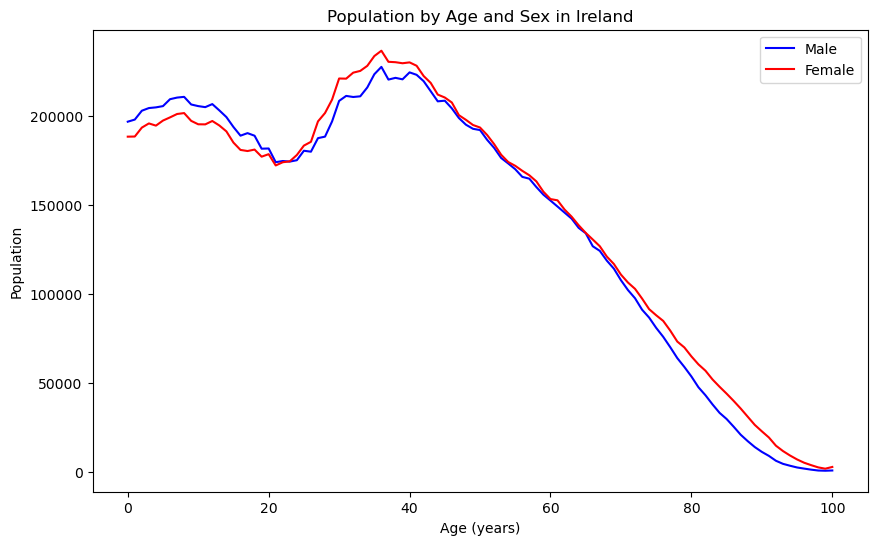

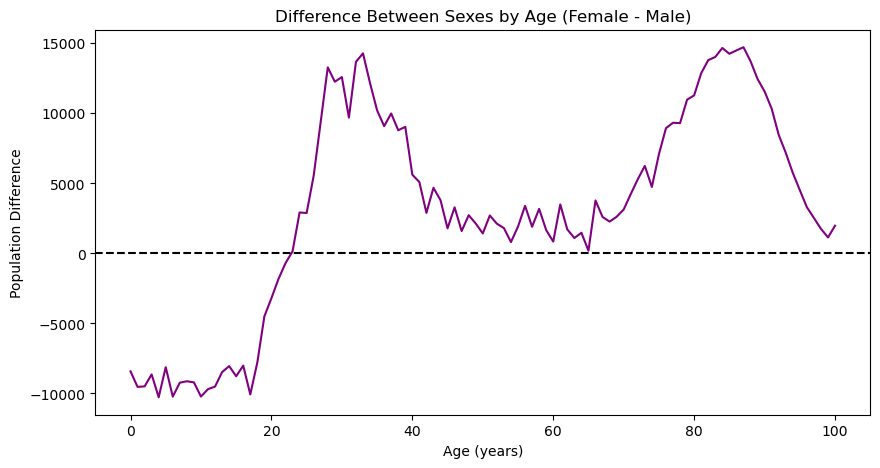

In [39]:
#  Visual information by graps
plt.figure(figsize=(10,6))
plt.plot(male_by_age["Single Year of Age"], male_by_age["Male"], label="Male", color="blue")
plt.plot(female_by_age["Single Year of Age"], female_by_age["Female"], label="Female", color="red")
plt.title("Population by Age and Sex in Ireland")
plt.xlabel("Age (years)")
plt.ylabel("Population")
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
plt.plot(diff_df["Single Year of Age"], diff_df["Difference (Female - Male)"], color="purple")
plt.axhline(0, color="black", linestyle="--")
plt.title("Difference Between Sexes by Age (Female - Male)")
plt.xlabel("Age (years)")
plt.ylabel("Population Difference")
plt.show()


### https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html

In [40]:
# Save in csv file
diff_df.to_csv("difference_between_sexes_by_age.csv", index=False)
print("\n Done — CSV saved.")


 Done — CSV saved.


## Part 2
### A. A variable that stores an age 35
### B. The people grouped within 5 years of that age together, into one age group 
### C. The population difference between the sexes in that age group

### https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html
### https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html
### https://realpython.com/pandas-groupby/

In [41]:
# A. Store an age in a variable
age_target = 35
print("Selected age:", age_target)

# Filter the dataset for people exactly that age
exact_age_df = df[df["Single Year of Age"] == age_target] 

# Group by sex and sum population
exact_age_by_sex = exact_age_df.groupby("Sex")["VALUE"].sum().reset_index() # Reset index for cleaner output

# Display results
print(f"\nPopulation aged exactly {age_target}:")
print(exact_age_by_sex)

# Optional: display total population at that age
total_at_age = exact_age_by_sex["VALUE"].sum()
print(f"\nTotal population aged {age_target}: {total_at_age:,}")

Selected age: 35

Population aged exactly 35:
      Sex   VALUE
0  Female  233574
1    Male  223358

Total population aged 35: 456,932


### https://pandas.pydata.org/docs/user_guide/indexing.html#boolean-indexing
### https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html

In [42]:
# B. Group people within 5 years of that age
# Target age
age_target = 35
age_min = age_target - 5
age_max = age_target + 5

# Filter ages within ±5 years
age_group_df = df[ 
    (df["Single Year of Age"] >= age_min) &
    (df["Single Year of Age"] <= age_max)
].copy()  # <-- make an explicit copy to avoid the warning

# Create 5-year bins safely
age_group_df.loc[:, "AgeGroup"] = (age_group_df["Single Year of Age"] // 5 * 5)

# Group by this new age group and sum population
grouped_age = age_group_df.groupby("AgeGroup")["VALUE"].sum().reset_index()

print("Population grouped in 5-year age bins:")
print(grouped_age)


Population grouped in 5-year age bins:
   AgeGroup    VALUE
0        30  2176286
1        35  2273102
2        40   454410


### https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pivot.html
### https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html
### https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.get.html

In [ ]:
# C. Calculate the population difference between the sexes in that age group

# Target age
age_target = 35
age_min = age_target - 5
age_max = age_target + 5

# Filter ages within ±5 years and keep only Male/Female
age_group_df = df[
    (df["Single Year of Age"] >= age_min) &
    (df["Single Year of Age"] <= age_max) &
    (df["Sex"].isin(["Male", "Female"]))
].copy()

# Create 5-year bins
age_group_df.loc[:, "AgeGroup"] = (age_group_df["Single Year of Age"] // 5 * 5)

# Group by AgeGroup and Sex and sum population
grouped = age_group_df.groupby(["AgeGroup", "Sex"])["VALUE"].sum().reset_index()

# Pivot to have Male/Female columns for easier calculation
pivoted = grouped.pivot(index="AgeGroup", columns="Sex", values="VALUE").fillna(0)

# Calculate population difference (Female - Male)
pivoted["Difference (Female - Male)"] = pivoted.get("Female", 0) - pivoted.get("Male", 0)


In [44]:
# Show the results
print("Population grouped by 5-year bins with sex difference:")
print(pivoted)

Population grouped by 5-year bins with sex difference:
Sex        Female     Male  Difference (Female - Male)
AgeGroup                                              
30        1119346  1056940                       62406
35        1160114  1112988                       47126
40         230016   224394                        5622


# Part 3
### The region in Ireland which has the biggest population difference between the sexes in that age group

In [45]:
# Target age ±5 years
age_target = 35
age_min = age_target - 5
age_max = age_target + 5

# Filter dataset for ages within ±5 years and only Male/Female
age_group_df = df[
    (df["Single Year of Age"] >= age_min) &
    (df["Single Year of Age"] <= age_max) &
    (df["Sex"].isin(["Male", "Female"]))
].copy()

### https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html
### https://pandas.pydata.org/docs/reference/api/pandas.cut.html

In [46]:
# Define explicit 5-year bins
bins = [29, 34, 39, 44]  # ranges: 30–34, 35–39, 40–44
labels = [30, 35, 40]

age_group_df.loc[:, "AgeGroup"] = pd.cut(
    age_group_df["Single Year of Age"],
    bins=bins,
    labels=labels,
    right=True
)

In [ ]:
 # Group by AgeGroup, County and City, and Sex
region_age_grouped = age_group_df.groupby(
    ["AgeGroup", "County and City", "Sex"], 
    observed=True # to avoid not necessary combinations
)["VALUE"].sum().reset_index() # index reseted for cleaner output

# Pivot to have Male/Female columns
pivoted = region_age_grouped.pivot_table(
    index=["AgeGroup", "County and City"],
    columns="Sex",
    values="VALUE",
    fill_value=0,
    observed=True
)


### https://docs.python.org/3/tutorial/controlflow.html#for-statements
### https://pandas.pydata.org/docs/user_guide/indexing.html#selection-by-label
### https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html

In [ ]:
# Calculate population difference
pivoted["Difference (Female - Male)"] = pivoted.get("Female", 0) - pivoted.get("Male", 0)

# Drop "State" if it exists
pivoted = pivoted.drop("State", level="County and City", errors="ignore")

# For each AgeGroup, find the County/City with the largest absolute difference
for age_bin in labels:
    if age_bin in pivoted.index.get_level_values("AgeGroup"): # Check if age_bin exists in the index
        age_slice = pivoted.loc[age_bin] # Slice for the specific age group
        # Find the County/City with the largest absolute difference
        region_max_diff = age_slice["Difference (Female - Male)"].abs().idxmax()
        max_diff_value = age_slice.loc[region_max_diff, "Difference (Female - Male)"]
        print(f"\nAge group {age_bin}:")
        print(f"County/City with largest population difference: {region_max_diff}")
        print(f"Population difference (Female - Male): {max_diff_value}")
    else:
        print(f"\nAge group {age_bin} has no data.")


Age group 30:
County/City with largest population difference: Cork City and Cork County
Population difference (Female - Male): 3893.0

Age group 35:
County/City with largest population difference: Fingal
Population difference (Female - Male): 2867.0

Age group 40:
County/City with largest population difference: Dublin City
Population difference (Female - Male): -562.0
